<a href="https://colab.research.google.com/github/giuliovv/tfest/blob/main/tfest_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tfest

  Created wheel for tfest: filename=tfest-0.1.7-py3-none-any.whl size=3089 sha256=119226f3647c83a7ad35f3bc0fae5bfef5254285bd30eadb3cf43b86515f7c43
  Stored in directory: /root/.cache/pip/wheels/4a/1f/dc/c840f9f1675cb3594b1cbfc66692f3ddc4cfc10495d95f30a9
Successfully built tfest


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tfest

from scipy import signal

In [3]:
s1 = signal.lti([1], [1, 1])

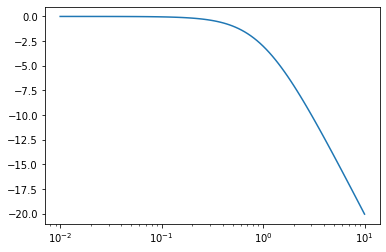

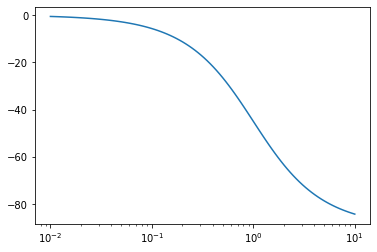

In [4]:
w, mag, phase = s1.bode()
plt.figure()
plt.semilogx(w, mag)    # Bode magnitude plot
plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.show()

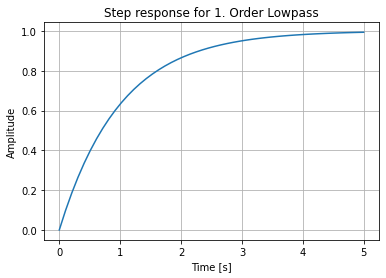

In [5]:
t = np.linspace(0, 5, num=50)
u = np.ones_like(t)
tout, y, x = signal.lsim(s1, u, t)
plt.plot(t, y)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Step response for 1. Order Lowpass')
plt.grid()

In [6]:
te = tfest.tfest(u, y)

In [7]:
te.estimate(nzeros=0, npoles=1, method="fft", time=5)

/usr/local/lib/python3.7/dist-packages/tfest/tfest.py:46: RuntimeWarning: divide by zero encountered in true_divide
  H = fft(self.y)/fft(self.u)
/usr/local/lib/python3.7/dist-packages/numpy/linalg/linalg.py:2560: RuntimeWarning: invalid value encountered in multiply
  s = (x.conj() * x).real
/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:597: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


 final_simplex: (array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]]), array([inf, inf, inf, inf]))
           fun: inf
       message: 'Maximum number of function evaluations has been exceeded.'
          nfev: 604
           nit: 121
        status: 1
       success: False
             x: array([1., 1., 1.])

In [8]:
te.get_transfer_function()

[1.0] [1.0, 1.0]


TransferFunctionContinuous(
array([1.]),
array([1., 1.]),
dt: None
)

[1.0] [1.0, 1.0]


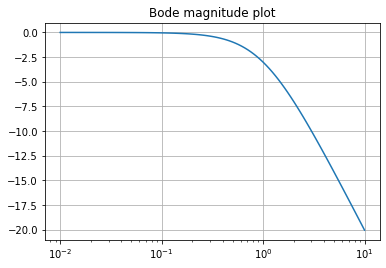

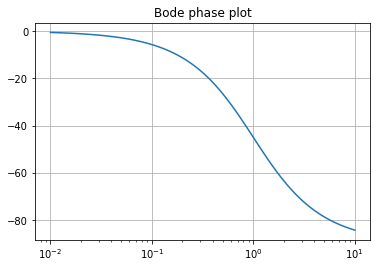

In [9]:
te.plot_bode()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


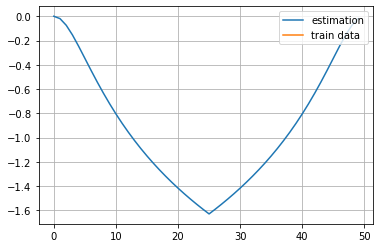

In [10]:
te.plot()